<a href="https://colab.research.google.com/github/Stamby22/DSCZ9_final_project/blob/main/Project_SDA_Butterflies_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SDA Butterflies classification


*   download data
*   gathering requirements
*   data visualization
*   data processing




## About Dataset

We use the dataset https://www.kaggle.com/datasets/chris565/butterflies-austria-20/code


This is the butterflies images Dataset.In this dataset there are 20 different species of butterflies living in Austria.

The dataset consits of over 7000 butterflies and every class consists of 300-500 species.

This Dataset consists of folder as butterflies and species csv file.

The butterflies folder further contains two folder: Train folder and val folder.

The Train and Val Folder further contains several folders of images.

There are 20 Number of files in Training Folder and 20 Number of Files in the Validation Folder.

## Load data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/Datasets/Butterflies_Austria_5_20.zip -d /content/Datasets


Archive:  /content/drive/MyDrive/Datasets/Butterflies_Austria_5_20.zip
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/
   creating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-001.jpg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-002.jpg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-003.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-004.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-006.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-007.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/train/ad/ad-008.jpeg  
  inflating: /content/Datasets/Butterflies_Austria_5_20/butterflies/trai

### Zobrazení Species.csv

In [12]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.regularizers import l1, l2

import tensorflow as tf

In [10]:
df=pd.read_csv("/content/Datasets/Butterflies_Austria_5_20/species_5.csv")
df#.head()

num abk      gname                   latin
0    1  ad    Admiral        Vanessa Atalanta
1    2  ap     Apollo       Parnassius Apollo
2    3  af     Aurora  Anthocharis Cardamines
3    4  bl  Blaeuling              Lycaenidae
4    5  cf   C-Falter       Polygonia C-album

In [13]:
dataset_dir = "/content/Datasets/Butterflies_Austria_5_20/"
train_dir = os.path.join(dataset_dir, "butterflies", "train")
val_dir = os.path.join(dataset_dir, "butterflies", "val")

# Define the path to your dataset directory
dataset_path = '/kaggle/input/butterflies-austria-20'


In [14]:
num_train_files = len(os.listdir(train_dir))
print(f"Number of files in the 'train' folder: {num_train_files}")

num_val_files = len(os.listdir(val_dir))
print(f"Number of files in the 'val' folder: {num_val_files}")

Number of files in the 'train' folder: 5
Number of files in the 'val' folder: 5


In [18]:
# Count images per folder in training data
def count_images_per_folder(data_path):
    folders = os.listdir(data_path)
    folders.sort()
    folder_counts = {}
    for folder in folders:
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            num_images = len(os.listdir(folder_path))
            folder_counts[folder] = num_images
    return folder_counts

# Vypíše počet obrázků v jednotlivých složkách train_dir
train_folder_counts = count_images_per_folder(train_dir)
print("Number of images in each folder of Training Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images")

# Vypíše počet obrázků v jednotlivých složkách val_dir
train_folder_counts = count_images_per_folder(val_dir)
print("\nNumber of images in each folder of Validation Data:")
for folder, count in train_folder_counts.items():
    print(f"{folder}: {count} images")

Number of images in each folder of Training Data:
ad: 24 images
af: 24 images
ap: 24 images
bl: 24 images
cf: 24 images

Number of images in each folder of Validation Data:
ad: 12 images
af: 14 images
ap: 13 images
bl: 13 images
cf: 12 images


## Show images

### Functions definitions

In [20]:
from PIL import Image

def display_image(image_path, title=""):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_images_with_titles(image_paths, titles):
    fig, ax = plt.subplots(2, 5, figsize=(20, 10))
    for i, image_path in enumerate(image_paths):
        row = i // 5
        col = i % 5
        image = Image.open(image_path)
        ax[row, col].imshow(image)
        ax[row, col].axis('off')
        ax[row, col].set_title(titles[i])
    plt.tight_layout()
    plt.show()

def display_images_with_titles_II(image_paths, titles):
    """
    Displays multiple images with titles in a single plot.

    Args:
        image_paths: A list of paths to the images.
        titles: A list of titles corresponding to the images.
    """
    num_images = len(image_paths)
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))  # Adjust figsize as needed

    for i in range(num_images):
        image = plt.imread(image_paths[i])
        axes[i].imshow(image)
        axes[i].set_title(titles[i])
        axes[i].axis('off')  # Remove axis labels

    plt.tight_layout()
    plt.show()

Number of images displayed: prvních 10


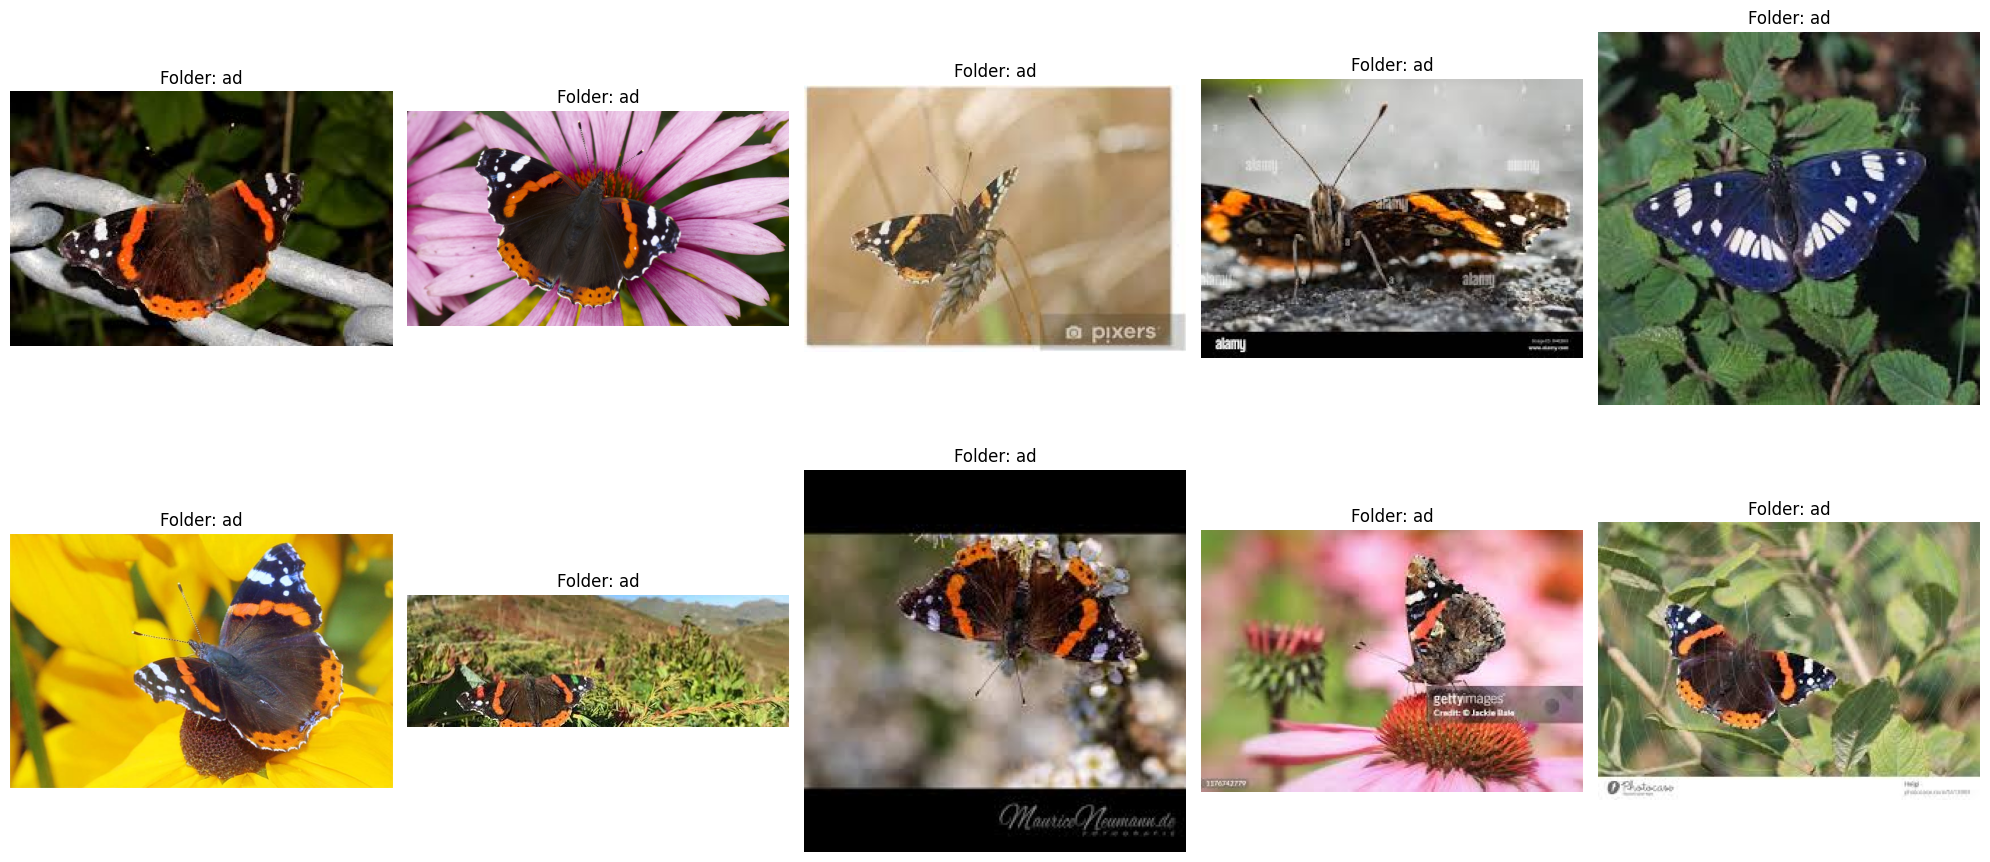

In [21]:
# Zobrazení prvních 10 obrázků prvního druhu

train_folders = os.listdir(train_dir)
train_folders.sort()
train_images_displayed = 0
train_image_paths = []
train_image_titles = []
for folder in train_folders:
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for i, image_file in enumerate(image_files):
        if train_images_displayed < 10:
            image_path = os.path.join(folder_path, image_file)
            train_image_paths.append(image_path)
            train_image_titles.append(f"Folder: {folder}")
            train_images_displayed += 1
        else:
            break

print(f"Number of images displayed: prvních {train_images_displayed}")
display_images_with_titles(train_image_paths, train_image_titles)


 Images of each Folder of Training Data::


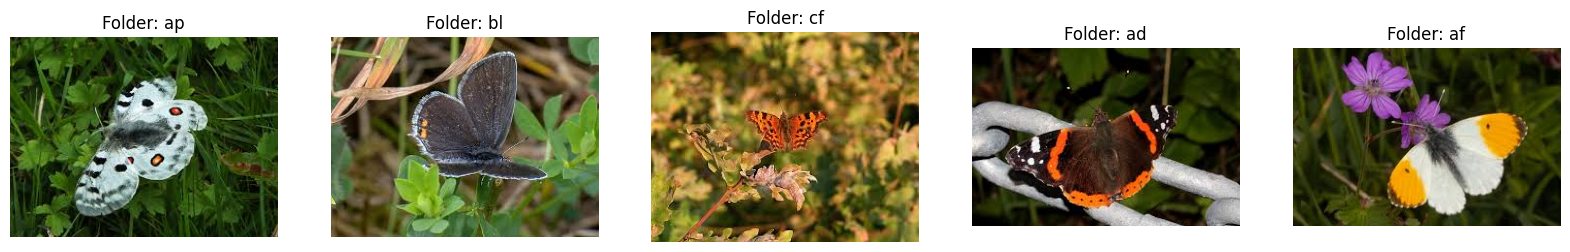


 Images of each folder of Validation Data::


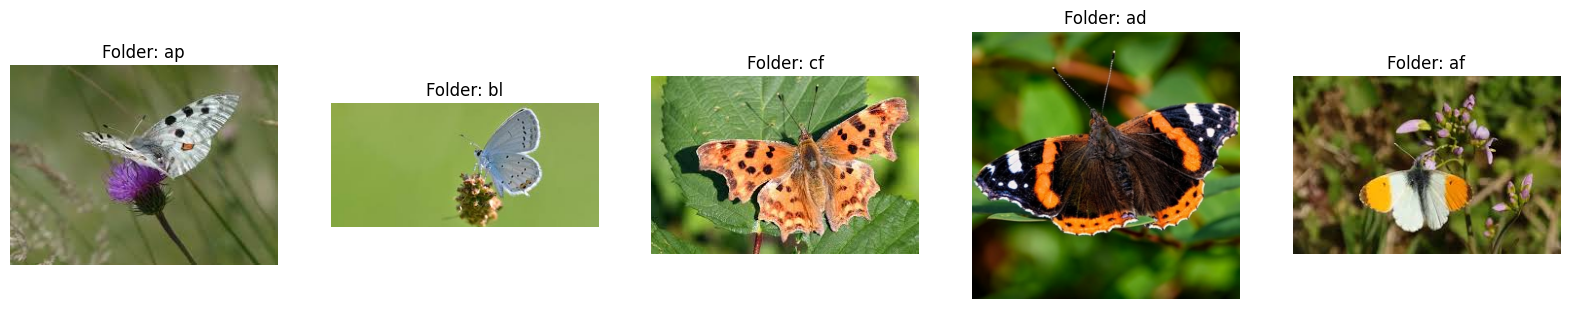

In [27]:
# Function to print bold headings
def print_bold_heading(heading):
    print(f"\n \033[1m{heading}:\033[0m")

# Display 10 images from each folder in the train folder
print_bold_heading("Images of each Folder of Training Data:")
train_folders = os.listdir(train_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(train_folders[:10]):
    folder_path = os.path.join(train_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

# Display 10 images from each folder in the validation folder
print_bold_heading("Images of each folder of Validation Data:")
val_folders = os.listdir(val_dir)
fig, ax = plt.subplots(1, 5, figsize=(20, 10))
for i, folder in enumerate(val_folders[:10]):
    folder_path = os.path.join(val_dir, folder)
    image_files = os.listdir(folder_path)
    for j, image_file in enumerate(image_files[:1]):
        image_path = os.path.join(folder_path, image_file)
        ax[i%5].imshow(Image.open(image_path))
        ax[i%5].axis('off')
        ax[i%5].set_title(f"Folder: {folder}")
plt.show()

## Model

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Load species CSV
df = pd.read_csv("/content/Datasets/Butterflies_Austria_5_20/species_5.csv")

# Define image generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/content/Datasets/Butterflies_Austria_5_20/butterflies/train',
        target_size=(224, 224),
        #batch_size=32,
        class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        '/content/Datasets/Butterflies_Austria_5_20/butterflies/val',
        target_size=(224, 224),
        #batch_size=32,
        class_mode='categorical')


Found 119 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


In [36]:
# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [37]:
base_model.input_shape

(None, 224, 224, 3)

In [40]:
# Unfreeze some layers in the base model
for layer in base_model.layers[:15]:
    layer.trainable = False
for layer in base_model.layers[15:]:
    layer.trainable = True

# Build the model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Compute class weights to handle class imbalance
class_weights = df['latin'].value_counts().sort_index().to_dict()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [42]:
# Train the model with early stopping
history = model.fit(
      train_generator,
      #steps_per_epoch=int(train_generator.samples/train_generator.batch_size),
      epochs=5,
      validation_data=val_generator,
      #validation_steps=int(val_generator.samples/val_generator.batch_size),
      #callbacks=[early_stopping],
      class_weight=class_weights)

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", accuracy)

Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 202s 56s/step - accuracy: 0.5977 - loss: 1.2613 - val_accuracy: 0.2344 - val_loss: 1.8436
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 136s 37s/step - accuracy: 0.5315 - loss: 1.1446 - val_accuracy: 0.2812 - val_loss: 1.9298
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 143s 40s/step - accuracy: 0.5677 - loss: 1.0748 - val_accuracy: 0.2812 - val_loss: 2.1851
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 176s 53s/step - accuracy: 0.7605 - loss: 0.6827 - val_accuracy: 0.3594 - val_loss: 2.2543
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 137s 37s/step - accuracy: 0.7789 - loss: 0.6074 - val_accuracy: 0.2969 - val_loss: 2.1608
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 19s/step - accuracy: 0.2812 - loss: 2.2983
Validation Accuracy: 0.296875


In [43]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
    plt.plot(history.history['val_accuracy'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

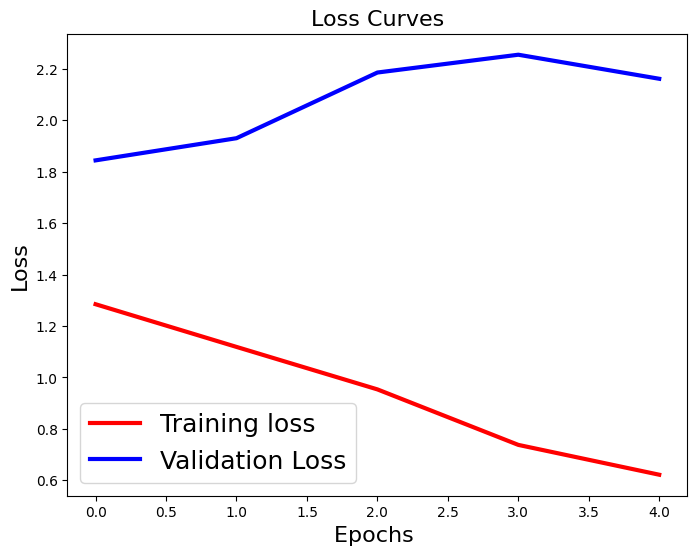

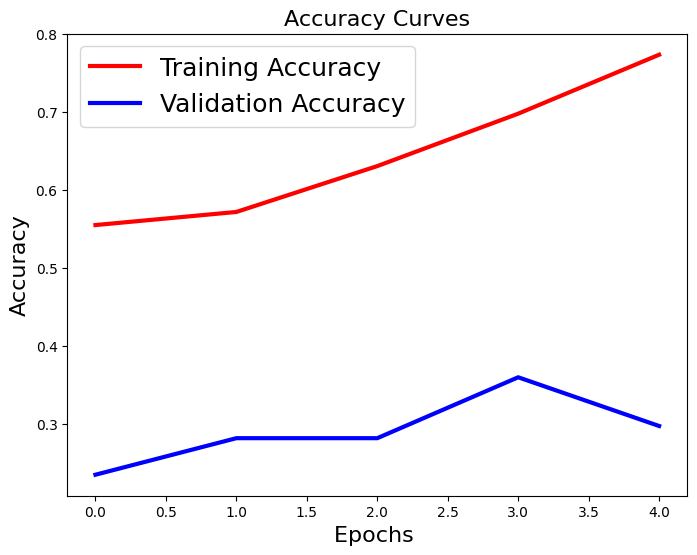

In [44]:
plot_history(history)

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 1. How and why to save a model for later?

It turns out that finding an accurate model is usually not the end of the project. Typically, one wants to save models to train them once, and then move them to production and enable loading easily by other users. It is especially important with deep learning algorithms which tend to take a very long time to train.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Save model after the training

In Keras, you can save a model using the `.save()` function:

```python
from keras.models import Sequential

# initialize, define, compile and train your model
model = Sequential()
# model.add(...)
model.fit(X_train, y_train, epochs=10)

model.save("model.h5")
```

You can use the built-in `.save()` function from Keras to save it to a file. In the example above, the model was saved as `"model.h5"` and such file extension `.h5` is commonly used for Keras models.

To later load the saved model, you can use the `load_model()` function from keras.models:

```python
from keras.models import load_model

loaded_model = load_model("path\to\your\model.h5")
```

This will load the model from the file `"model.h5"` into the `loaded_model` variable, allowing you to use it for prediction or further training.

Note that when saving a model, Keras saves:
* model architecture,
* optimizer,
* and learned weights,

so you can resume training or make predictions with the loaded model without needing to recompile it. Remember to adjust the file path and name according to your needs when saving and loading the model.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Save model during the training

Saving the model during the training process can be also useful. If you iterate the model over multiple epochs, typically you want to select the best model and often this is not the last one. For that reason you can save the model at regular intervals or overwrite it with the best one.

Let's see how it looks with an example familiar from the last class!

In [ ]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape((-1, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = x_test.reshape((-1, 28 * 28))
x_test = x_test.astype('float32') / 255

x_train.shape, x_test.shape

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def train_neural_network(
    x_train=x_train, y_train=y_train, epochs=5, callbacks=None
):
    # sequential model initialization
    neural_network = Sequential()

    # neural network model architecture - add consecutive layers
    neural_network.add(
        Dense(512, activation='relu', input_shape=(28 * 28, ))
    )
    neural_network.add(
        Dense(10, activation='softmax')
    )

    # specify loss function, optimization alg., and optional metrics
    neural_network.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = neural_network.fit(
        x=x_train,
        y=y_train,
        batch_size=256,
        epochs=epochs,
        verbose=True,
        validation_split=0.2,
        callbacks=callbacks
    )

    return history

def plot_results(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    min_val_loss = min(history.history['val_loss'])
    min_val_loss_idx = np.argmin(history.history['val_loss'])
    plt.axhline(min_val_loss, color='red', linestyle='dashed')
    plt.plot(
        min_val_loss_idx,
        min_val_loss,
        'ro',
        label=f'epoch: {min_val_loss_idx}'
    )

    plt.xlabel('Epoch Number')
    plt.ylabel("Loss Magnitude")
    plt.legend()
    plt.show()

In [ ]:
history = train_neural_network()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6952 - loss: 0.8947 - val_accuracy: 0.8126 - val_loss: 0.5383
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8311 - loss: 0.4651 - val_accuracy: 0.8522 - val_loss: 0.4025
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8513 - loss: 0.4032 - val_accuracy: 0.8574 - val_loss: 0.3907
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8715 - loss: 0.3492 - val_accuracy: 0.8608 - val_loss: 0.3791
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8790 - loss: 0.3284 - val_accuracy: 0.8749 - val_loss: 0.3452


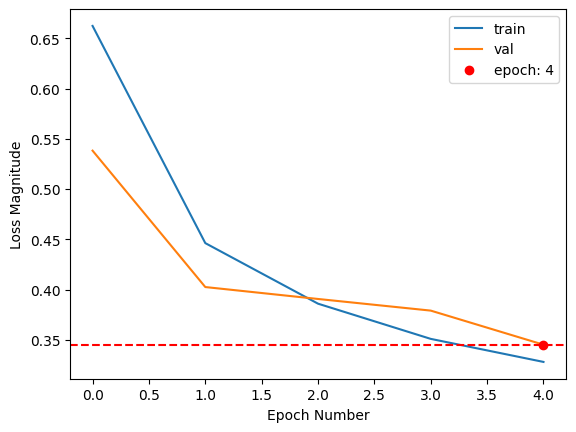

In [ ]:
plot_results(history=history)

If you find the point at which your model has achieved the best degree of generalization to validation data then, unless the model has been training for a very long time, you can try to train it again and stop at the XXX epoch...

In [ ]:
history = train_neural_network(epochs=10)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6981 - loss: 0.8999 - val_accuracy: 0.8069 - val_loss: 0.5105
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8335 - loss: 0.4630 - val_accuracy: 0.8023 - val_loss: 0.5090
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8511 - loss: 0.4034 - val_accuracy: 0.8576 - val_loss: 0.4027
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8633 - loss: 0.3661 - val_accuracy: 0.8562 - val_loss: 0.3963
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8789 - loss: 0.3330 - val_accuracy: 0.8720 - val_loss: 0.3562
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8810 - loss: 0.3176 - val_accuracy: 0.8804 - val_loss: 0.3318
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8907 - loss: 0.2976 - val_accuracy: 0.8680 - val_loss: 0.3621
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8977 - loss: 0.2800 - val_accu

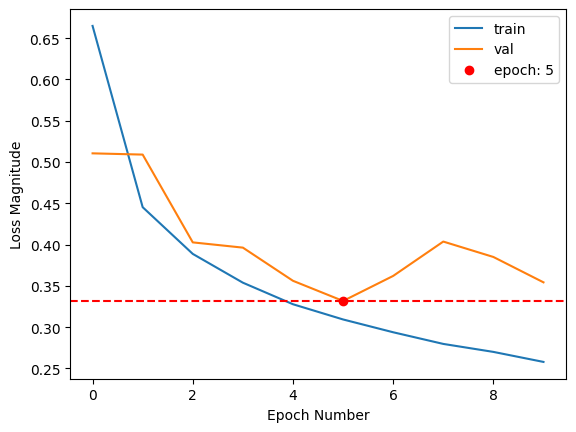

In [ ]:
plot_results(history=history)

Wait a minute... You'll usually get a slightly different results unless you repeat the process carefully at each level to provide reproducibility.

A better approach would be to save models during training:

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# checkpoint_filepath = '/tmp/MNIST_model_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint_filepath = '/tmp/MNIST_model_best.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

model_earlystopping_callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=3
)

history = train_neural_network(epochs=100, callbacks=[model_checkpoint_callback, model_earlystopping_callback])

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6957 - loss: 0.9034 - val_accuracy: 0.8200 - val_loss: 0.4975
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8336 - loss: 0.4624 - val_accuracy: 0.8408 - val_loss: 0.4310
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.8534 - loss: 0.3985 - val_accuracy: 0.8463 - val_loss: 0.4204
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8702 - loss: 0.3535 - val_accuracy: 0.8666 - val_loss: 0.3726
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8724 - loss: 0.3373 - val_accuracy: 0.8687 - val_loss: 0.3622
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8833 - loss: 0.3130 - val_accuracy: 0.8678 - val_loss: 0.3581
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8900 - loss: 0.2952 - val_accuracy: 0.8552 - val_loss: 0.3827
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8954 - loss: 0.2826 - 

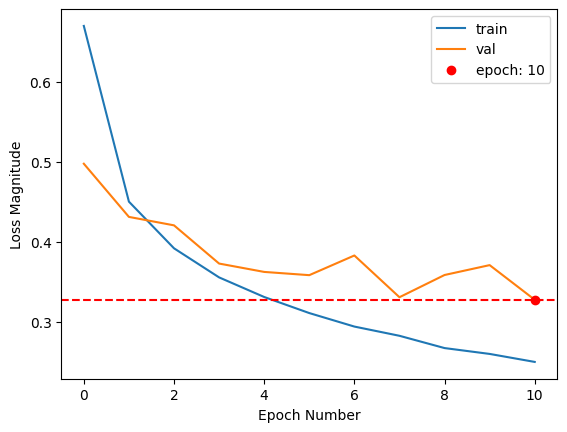

In [ ]:
plot_results(history=history)

In [ ]:
neural_network = Sequential()

neural_network.add(
    Dense(512, activation='relu', input_shape=(28 * 28, ))
)
neural_network.add(
    Dense(10, activation='softmax')
)

neural_network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

neural_network.load_weights(checkpoint_filepath)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Compare the two models, ie. `neural_network` & `neural_network_both`, with each other both in terms of architecture (use `.get_config()` and/or `.summary()`) and model parameters (with `.get_weights()`).

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
neural_network_both = load_model(checkpoint_filepath)

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 2. Customized Training

And this is just the tip of the iceberg.... see what else you can change during training to get the best results faster!

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Early completion of training

As we saw in the previous section, saving the model at different training points allows you to evaluate its performance on a validation set at those stages. But what if it turns out that the number of epochs set before the start of training is significantly too high? You can, of course, stop this training manually (as long as you notice the moment) or you can waste computing resources for many more hours even though there is no benefit to the model which only overfits itself further.

Use "early stopping" that helps to prevent overfitting, as you can stop training when the model's performance on the validation set starts to degrade.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=0,
    verbose=True,
    mode="min",
    restore_best_weights=True,
    # start_from_epoch=0,
)

history = train_neural_network(epochs=1000, callbacks=early_stopping_callback)

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6914 - loss: 0.9047 - val_accuracy: 0.7969 - val_loss: 0.5210
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.8371 - loss: 0.4602 - val_accuracy: 0.8514 - val_loss: 0.4139
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8582 - loss: 0.3911 - val_accuracy: 0.8529 - val_loss: 0.3945
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8681 - loss: 0.3567 - val_accuracy: 0.8633 - val_loss: 0.3752
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8798 - loss: 0.3263 - val_accuracy: 0.8798 - val_loss: 0.3345
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8835 - loss: 0.3111 - val_accuracy: 0.8753 - val_loss: 0.3483
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 5.


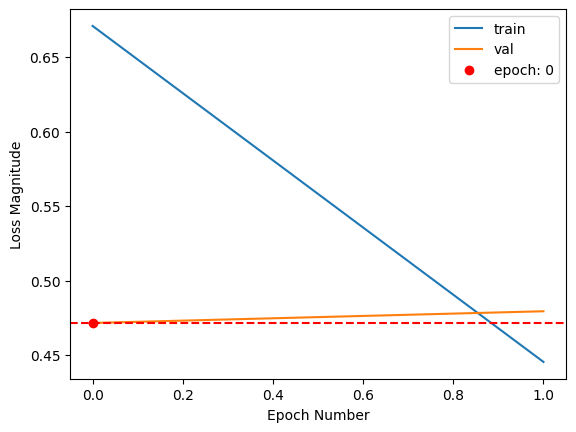

In [ ]:
plot_results(history=history)

Of course, it is worth considering whether such a slight deterioration in performance after one iteration is reason enough to stop training immediately... Usually, the first few epochs are worth leaving for network training startup and to increase the number of ineffective optimization steps slightly (controlled with `patience`).

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=10,
    verbose=True,
    mode="min",
    restore_best_weights=True,
    start_from_epoch=10,
)

history = train_neural_network(epochs=1000, callbacks=early_stopping_callback)

Epoch 1/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6953 - loss: 0.9145 - val_accuracy: 0.7657 - val_loss: 0.6395
Epoch 2/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8321 - loss: 0.4645 - val_accuracy: 0.8544 - val_loss: 0.4040
Epoch 3/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8533 - loss: 0.4024 - val_accuracy: 0.8556 - val_loss: 0.3905
Epoch 4/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8679 - loss: 0.3567 - val_accuracy: 0.8733 - val_loss: 0.3550
Epoch 5/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8782 - loss: 0.3297 - val_accuracy: 0.8449 - val_loss: 0.4365
Epoch 6/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8839 - loss: 0.3124 - val_accuracy: 0.8692 - val_loss: 0.3680
Epoch 7/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8898 - loss: 0.2939 - val_accuracy: 0.8657 - val_loss: 0.3638
Epoch 8/1000
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8962 - loss: 0

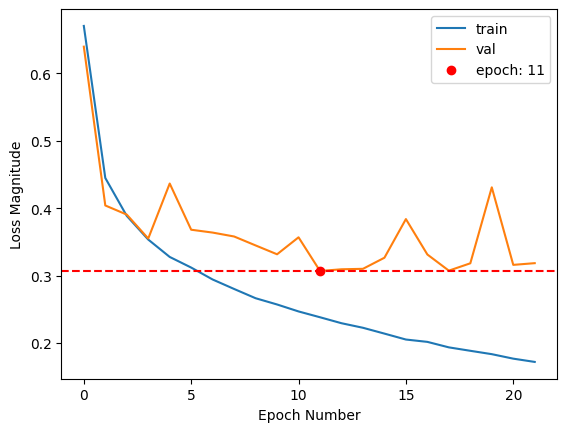

In [ ]:
plot_results(history=history)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Transfer learning & data augmentation

Imagine that you already have a trained model that can distinguish well between dogs and cats and has seen tens of thousands of them. This time your task is to train a model that distinguishes between the breeds of different dogs, but you have a few different pictures at your disposal.

Is it even possible to create such a model? Yes, using the previous model and transfer learning. In transfer learning scenarios, you use a pre-trained model as a starting point for a new task. Saving the pre-trained model enables you to easily load it and adjust or fine-tune it on the new data.

Usually, you have to (see also https://keras.io/guides/transfer_learning/):
1. Extract layers from a pre-trained model (typically, dropping the last layer(s)).
1. Freeze the extracted layers (or at least some of them) to preserve their existing information during subsequent training rounds. In more advanced scenarios, one can also shorten the fine-tuning process and/or adjust the learning rate.
1. Introduce new trainable layers on top of the frozen ones or make some of the existing ones trainable as well. These new layers will learn to transform the existing features into predictions on a fresh dataset.
1. Train the newly added layers using your dataset.

In [ ]:
import tensorflow_datasets as tfds

from tensorflow.keras.layers import (
    RandomFlip,
    RandomRotation,
    Input,
    Rescaling,
    GlobalAveragePooling2D,
    Dense,
    Dropout
)

from tensorflow.keras.models import Model

In [ ]:
# get the data
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # include labels
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

KeyboardInterrupt: 

In [ ]:
# resize all images to the same shape
size = (150, 150)

train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
# optimization of data loading
batch_size = 64

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [ ]:
# see the description below
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1)
])

In [ ]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # load weights pre-trained on ImageNet
    input_shape=(150, 150, 3),
    include_top=False  # do not include the ImageNet classifier at the top
)

# freeze layers of the base model
base_model.trainable = False

# create new model on top
inputs = Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # apply random data augmentation
scale_layer = Rescaling(scale=1 / 127.5, offset=-1)  # Xception values -1 to 1
x = scale_layer(x)

x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_5 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 5, 5, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

history = model.fit(
    train_ds,
    epochs=20,
    callbacks=early_stopping_callback,
    validation_data=validation_ds
)

history = train_neural_network(epochs=1000, callbacks=early_stopping_callback)

Epoch 1/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 43s 213ms/step - binary_accuracy: 0.8818 - loss: 0.2578 - val_binary_accuracy: 0.9673 - val_loss: 0.0861
Epoch 2/20
146/146 ━━━━━━━━━━━━━━━━━━━━ 26s 180ms/step - binary_accuracy: 0.9435 - loss: 0.1299 - val_binary_accuracy: 0.9678 - val_loss: 0.0808
Epoch 3/20
 30/146 ━━━━━━━━━━━━━━━━━━━━ 16s 146ms/step - binary_accuracy: 0.9409 - loss: 0.1273

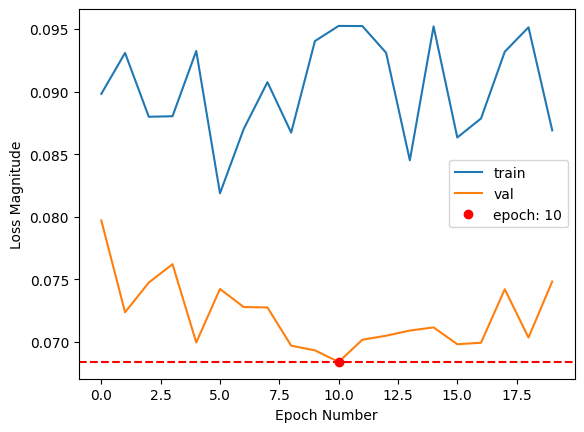

In [ ]:
plot_results(history=history)

Data augmentation is a technique used to increase the size and diversity of a training dataset by applying various transformations to the original data. It is commonly used in machine learning, especially in computer vision and natural language processing tasks.

The primary goal of data augmentation is to improve the generalization and robustness of the model by exposing it to a wider range of variations in the input data. By creating multiple versions of the same data with slight modifications, the model becomes more capable of handling different variations and patterns that it might encounter during inference on new, unseen data.

In computer vision, data augmentation techniques may include, among others, image rotation, flip, zoom, translation and in natural language processing text synonyms, translation, rearrangment of the order of words or phrases in the text.

In [ ]:
# varianta bez GlobalAveragePooling2D
from tensorflow.keras.layers import Flatten
# create new model on top
inputs = Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # apply random data augmentation
scale_layer = Rescaling(scale=1 / 127.5, offset=-1)  # Xception values -1 to 1
x = scale_layer(x)

x = base_model(x, training=False)
x = Flatten()(x)
x = Dropout(0.2)(x)
outputs = Dense(1)(x)

model2 = Model(inputs, outputs)
model2.summary()

NameError: name 'Input' is not defined

In [ ]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

history = model2.fit(
    train_ds,
    epochs=20,
    callbacks=early_stopping_callback,
    validation_data=validation_ds
)


Epoch 1/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 32s 93ms/step - binary_accuracy: 0.9093 - loss: 0.3878 - val_binary_accuracy: 0.9553 - val_loss: 0.2678
Epoch 2/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - binary_accuracy: 0.9431 - loss: 0.3413 - val_binary_accuracy: 0.9617 - val_loss: 0.2214
Epoch 3/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 26s 91ms/step - binary_accuracy: 0.9468 - loss: 0.3203 - val_binary_accuracy: 0.9544 - val_loss: 0.4340
Epoch 4/20
291/291 ━━━━━━━━━━━━━━━━━━━━ 26s 90ms/step - binary_accuracy: 0.9509 - loss: 0.3936 - val_binary_accuracy: 0.9660 - val_loss: 0.2596
Epoch 5/20
216/291 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - binary_accuracy: 0.9506 - loss: 0.4234

KeyboardInterrupt: 

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

See how the effectiveness of the model was affected by the various tricks:
* transfer learning
    * try to build your own model
    * incorporate Xception architecture but do not freeze any layer
* data augmentation

In [ ]:
pass

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 3. Applications: Computer Vision

**<font color='#4472c4'>OpenCV (Open Source Computer Vision)</font>** is an open-source library of computer vision and image processing functions and algorithms. It provides a comprehensive set of tools and libraries that enable developers to create applications for tasks such as image and video processing, object detection and recognition, facial analysis, and more.

Originally developed by Intel, OpenCV is now maintained by the OpenCV community and has become a widely used library in the field of computer vision. It is written in C++ and offers interfaces for various programming languages, including Python and Java.

OpenCV supports hardware acceleration using technologies like CUDA for efficient computation on GPUs. Also its versatility and extensive capabilities  make it a popular choice for a variety of applications, including robotics, augmented reality, medical imaging, surveillance, automotive, and more.

In [ ]:
# https://pypi.org/project/opencv-python/
# !pip install opencv-python

import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# see https://en.wikipedia.org/wiki/Lenna and upload the image first
image_path = "Lenna.png"
image = cv2.imread(image_path)

array([[[127, 137, 225],
        [126, 136, 223],
        [118, 133, 227],
        ...,
        [127, 140, 227],
        [124, 149, 232],
        [103, 119, 212]],

       [[127, 137, 225],
        [126, 136, 223],
        [119, 133, 226],
        ...,
        [129, 143, 230],
        [126, 154, 238],
        [105, 123, 218]],

       [[121, 136, 226],
        [117, 134, 224],
        [116, 133, 227],
        ...,
        [105, 113, 208],
        [ 96,  96, 188],
        [ 79,  60, 148]],

       ...,

       [[ 59,  27,  90],
        [ 61,  29,  94],
        [ 62,  28,  96],
        ...,
        [ 68,  41, 125],
        [ 72,  57, 147],
        [ 72,  58, 158]],

       [[ 60,  24,  87],
        [ 61,  26,  91],
        [ 60,  25,  94],
        ...,
        [ 77,  58, 143],
        [ 80,  67, 166],
        [ 77,  64, 169]],

       [[ 57,  22,  84],
        [ 62,  28,  95],
        [ 59,  23,  93],
        ...,
        [ 84,  66, 159],
        [ 81,  69, 176],
        [ 80,  71, 181]]], dtype=uint8)
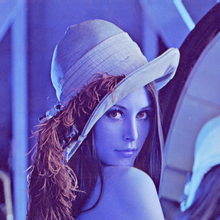

In [ ]:
image

In [ ]:
image.shape

(220, 220, 3)

In [ ]:
h, w, c = image.shape

print(f'width: {w} pixels')
print(f'height: {h} pixels')
print(f'channels: {c}')

width: 220 pixels
height: 220 pixels
channels: 3


In [ ]:
# it does not work with .ipynb files
# cv2.imshow('Lenna', image)

# waits for user to press any key
# (this is necessary to avoid Python kernel form crashing)
# cv2.waitKey(0)

# closing all open windows
# cv2.destroyAllWindows()

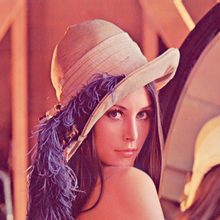

In [ ]:
cv2_imshow(image)

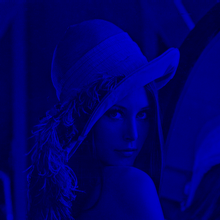

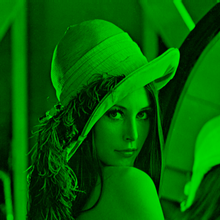

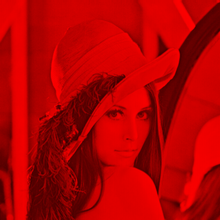

In [ ]:
b = image.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0

cv2_imshow(b)

g = image.copy()
# set green and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

cv2_imshow(g)

r = image.copy()
# set green and red channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0

cv2_imshow(r)

In [ ]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.cifar10.load_data()

print('Training data shape : ', train_x.shape, train_y.shape)
print('Testing data shape : ', test_x.shape, test_y.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


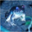

In [ ]:
cv2_imshow(train_x[0])

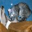

In [ ]:
cv2_imshow(test_x[0])

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Image classification with CIFAR10 dataset & CNNs



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    # Input
)

In [ ]:
# convert integers 0-255 to floats in range of 0-1
train_x = train_x / 255
test_x = test_x / 255

# change the labels from integer to categorical data
train_y_one_hot = tf.keras.utils.to_categorical(train_y)
test_y_one_hot = tf.keras.utils.to_categorical(test_y)

In [ ]:
early_stopping_callback = EarlyStopping(
    monitor="val_loss",
    patience=3,
    verbose=True,
    mode="min",
    restore_best_weights=True,
    # start_from_epoch=0,
)

In [ ]:
train_y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
N_CLASSES = len(set(train_y.flatten()))

model = Sequential()

# model.add(Input(...))

model.add(Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same',  # valid
    input_shape=train_x.shape[1:]  # (50000, 32, 32, 3) → (32, 32, 3),
))

model.add(Conv2D(
    32,
    (3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same'
))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(
    64,
    (3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same'
))

model.add(Conv2D(
    64,
    (3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same'
))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(
    128,
    (3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same'
))

model.add(Conv2D(
    128,
    (3, 3),
    activation='relu',
    kernel_initializer='he_uniform',
    padding='same'
))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())  # np.flatten(), np.reshape(-1), e.g. 2x2x8 → 32
model.add(Dense(
    128,
    activation='relu',
    kernel_initializer='he_uniform'
))

model.add(Dense(
    N_CLASSES,  # here 10
    activation='softmax'
))

# compile model
opt = tf.keras.optimizers.SGD(
    #lr=0.001,
    #momentum=0.9
)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit model
history = model.fit(
    train_x,
    train_y_one_hot,
    epochs=100,
    batch_size=512,
    validation_data=(test_x, test_y_one_hot),
    callbacks=early_stopping_callback,
    verbose=1
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
38/98 ━━━━━━━━━━━━━━━━━━━━ 3:45 4s/step - accuracy: 0.1404 - loss: 2.2952

KeyboardInterrupt: 

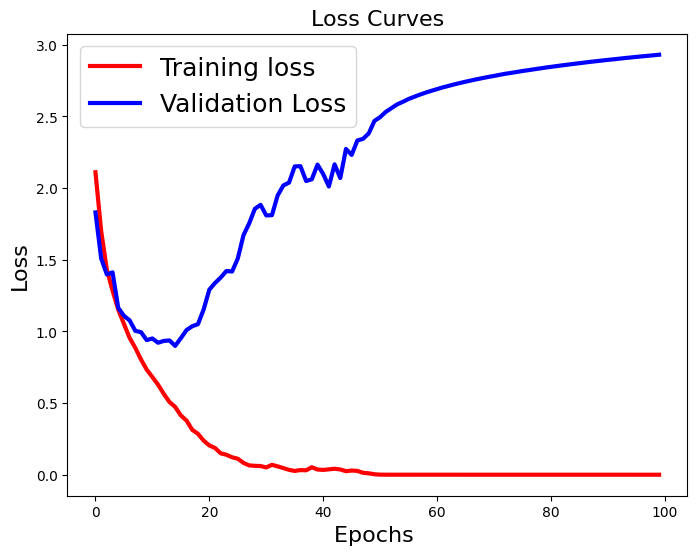

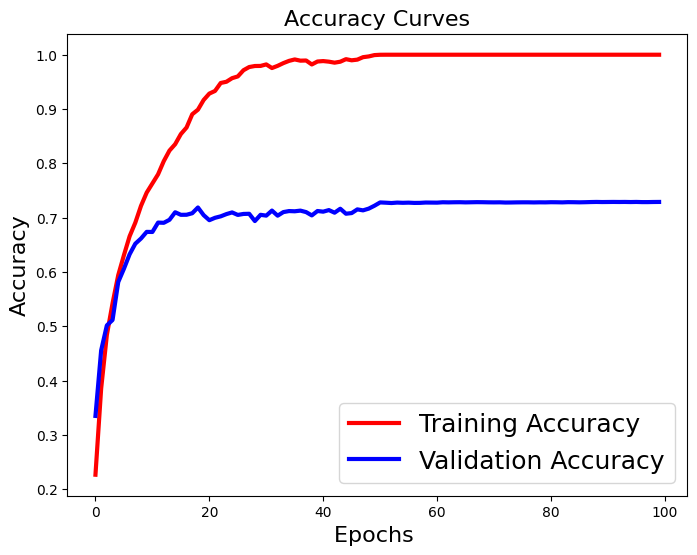

In [ ]:
plot_history(history)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Overcoming CNN overfitting (with BatchNormalization and Dropout)

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [ ]:
N_CLASSES = len(set(train_y.flatten()))
DROPOUT = 0.2


model = Sequential()

model.add(Conv2D(
    32,
    (3, 3),
    activation= 'relu',
    kernel_initializer='he_uniform',
    padding='same',
    input_shape=(32, 32, 3)
))
model.add(BatchNormalization())

model.add(Conv2D(32, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform', padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D ((2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,padding= 'same'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D ((2, 2)))
model.add(Dropout(DROPOUT))

model.add(Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,padding= 'same'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation= 'relu', kernel_initializer= 'he_uniform' ,padding= 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D ((2, 2)))
model.add(Dropout(DROPOUT))

model.add(Flatten())
model.add(Dense(128, activation= 'relu', kernel_initializer= 'he_uniform' ))
model.add(BatchNormalization())
model.add(Dropout(DROPOUT))
model.add(Dense(N_CLASSES, activation= 'softmax' ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile model
opt = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit model
history = model.fit(
    train_x,
    train_y_one_hot,
    epochs=50,
    batch_size=2048,
    validation_data=(test_x, test_y_one_hot),
    verbose=1
)

Epoch 1/50
15/25 ━━━━━━━━━━━━━━━━━━━━ 3:26 21s/step - accuracy: 0.1415 - loss: 2.9262

KeyboardInterrupt: 

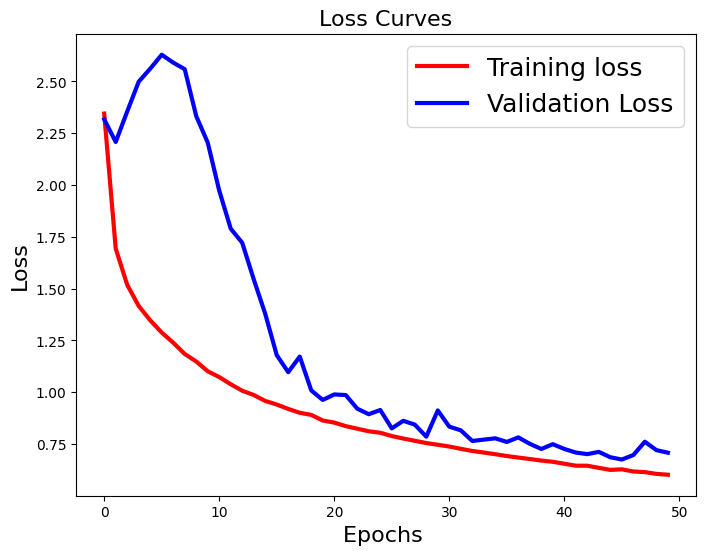

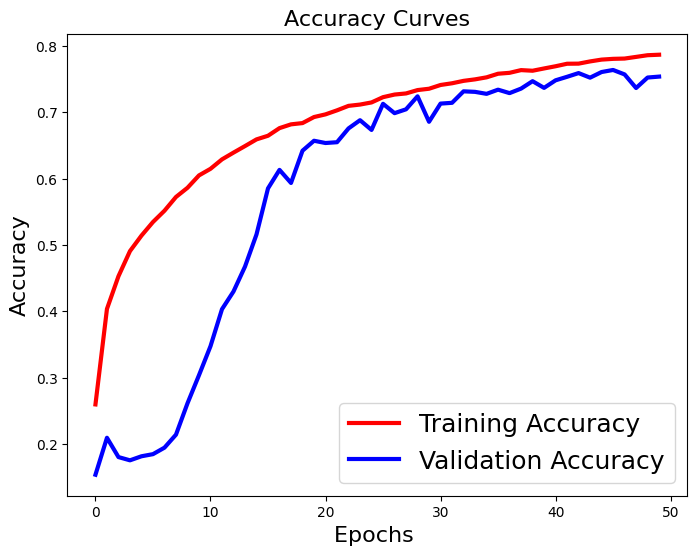

In [ ]:
plot_history(history)

#### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Divide into smaller groups or even one-person teams and have everyone try to use `Dropout` in a slightly different way (i.e., in different places and with a different ratio), for example:
* dropout after each block (and FC layer) vs. dropout after each Conv2D layer,
* value from 0.01 up to 0.5,
* constant value for each Dropout layer or increasing/decreasing values.

What gives the best results?

In [ ]:
pass

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Using pre-defined architectures (MobileNet)

In [ ]:
from keras.models import Model
from tensorflow.keras.applications import MobileNet

In [ ]:
# model = MobileNetV2(
model = MobileNet(
    # input_shape=(train_x.shape[1], train_x.shape[2], 3),
    input_shape=(train_x.shape[1:]),
    alpha=0.5,
    classes=10,
    dropout=0.15,
    include_top=True,
    weights=None
)

In [ ]:
# compile model
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit model
history = model.fit(
    train_x,
    train_y_one_hot,
    epochs=50,
    batch_size=512,
    validation_data=(test_x, test_y_one_hot),
    verbose=1
)

Epoch 1/50
98/98 [==============================] - 13s 55ms/step - loss: 2.2421 - accuracy: 0.1805 - val_loss: 2.3087 - val_accuracy: 0.1000
Epoch 2/50
98/98 [==============================] - 3s 32ms/step - loss: 1.8115 - accuracy: 0.3295 - val_loss: 2.3205 - val_accuracy: 0.1000
Epoch 3/50
98/98 [==============================] - 3s 36ms/step - loss: 1.6307 - accuracy: 0.4023 - val_loss: 2.3493 - val_accuracy: 0.1000
Epoch 4/50
98/98 [==============================] - 3s 35ms/step - loss: 1.5291 - accuracy: 0.4395 - val_loss: 2.3603 - val_accuracy: 0.1000
Epoch 5/50
98/98 [==============================] - 3s 33ms/step - loss: 1.4593 - accuracy: 0.4686 - val_loss: 2.2395 - val_accuracy: 0.1409
Epoch 6/50
98/98 [==============================] - 3s 32ms/step - loss: 1.3968 - accuracy: 0.4938 - val_loss: 1.7663 - val_accuracy: 0.4024
Epoch 7/50
98/98 [==============================] - 3s 33ms/step - loss: 1.3426 - accuracy: 0.5152 - val_loss: 1.5076 - val_accuracy: 0.4585
Epoch 8/50
9

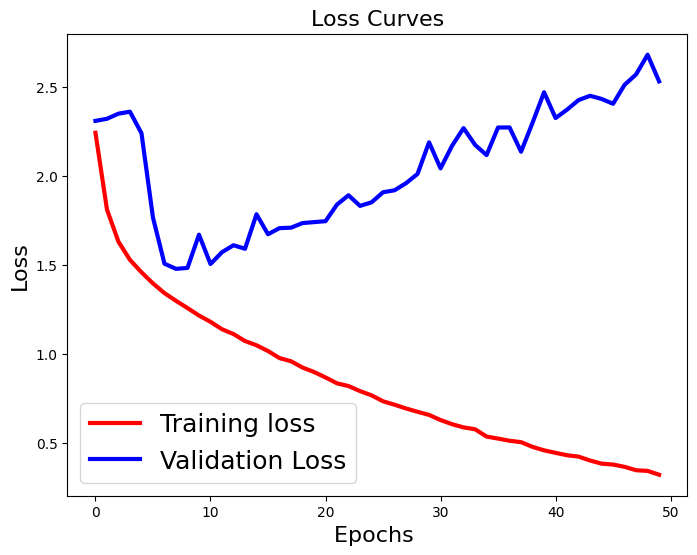

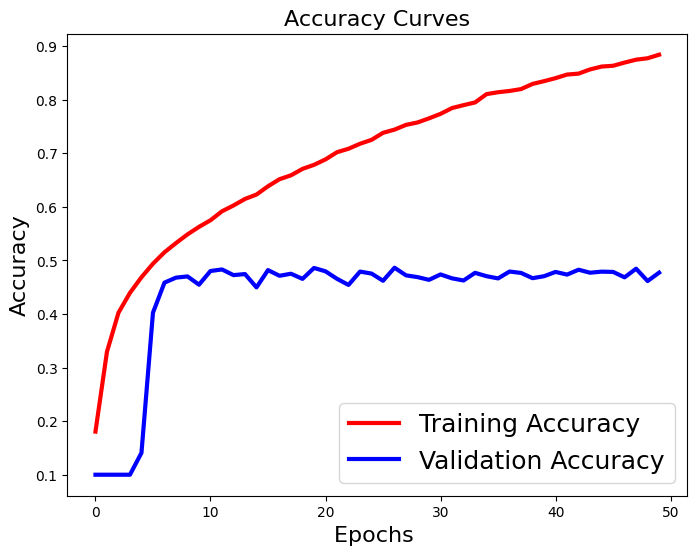

In [ ]:
plot_history(history)

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 4. Applications: Natural Language Processing

**<font color='#4472c4'>Natural Language Processing (NLP)</font>** is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and human language. It involves the development of algorithms and models to understand, interpret, and generate human language in a way that is meaningful and useful.

It involves a range of tasks, including:
* Text Classification
* Named Entity Recognition (NER)
* Sentiment Analysis
* Machine Translation
* Question Answering
* Text Summarization
* Chatbots and Virtual Assistants

In [ ]:
def plot_history(history):
    # plot the Loss curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['loss'],'r',linewidth=3.0)
    plt.plot(history.history['val_loss'],'b',linewidth=3.0)

    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.show()

    # plot the Accuracy curve(s)
    plt.figure(figsize=[8,6])

    plt.plot(history.history['acc'], 'r', linewidth=3.0)
    plt.plot(history.history['val_acc'], 'b',linewidth=3.0)

    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Recurrent Neural Networks with Keras

The process that can be easily implemented using the Numpy library is fortunately available through Keras package with a layer called `SimpleRNN`:

In [ ]:
from keras.layers import SimpleRNN

Note that the SimpleRNN layer divides input data sequences into batches (as do all layers in Keras) - it does not process single sequences unless you set `batch_size=1`. Therefore, this layer accepts 3D input objects of the shape `(input_value, time_steps, entry_characteristics)`.

The SimpleRNN layer, like all recursive layers of the Keras package, can be run in two modes:
* it can return full sequences of consecutive output objects for each time step (three-dimensional tensors (input_value, time_steps, entry_characteristics))
```python
model.add(SimpleRNN(32, return_sequences=True))
```
* or only the last output objects of each input sequence (two-dimensional shaped tensors (time_steps, entry_characteristics))
```python
model.add(SimpleRNN(32))
```

The mode of operation is selected using the return_sequences argument. Let's analyze an example in which the SimpleRNN layer is used, and the output is returned only when processing the last time step:

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Sometimes it is a good idea to create a stack of several recursive layers. This increases the power of representation by the network. In this configuration, all intermediate layers must return the full sequence of output objects:

In [ ]:
model = Sequential()

model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # The last layer returns only the last output object.

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Now let's use such a model to solve the problem of rating movie reviews. Let's start with the pre-processing of data:

In [ ]:
from keras.datasets import imdb
from keras.utils import pad_sequences

max_features = 10000  # The number of words treated as characteristics.
maxlen = 500  # Cuts reviews after this number of words belonging to the set of max_features words most common in the set.
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features
)
print(len(input_train), 'training sequences')
print(len(input_test), 'test sequences')

print('Sequences (samples x time)')
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
print('Shape of the object input_train:', input_train.shape)
print('Shape of the object input_test:', input_test.shape)


Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 training sequences
25000 test sequences
Sequences (samples x time)
Shape of the object input_train: (25000, 500)
Shape of the object input_test: (25000, 500)


Let's train a simple recursive network using the Embedding layer and the SimpleRNN layer.

In [ ]:
from keras.layers import Dense

model = Sequential()

model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - acc: 0.5503 - loss: 0.6783 - val_acc: 0.5160 - val_loss: 0.8695
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - acc: 0.7672 - loss: 0.5019 - val_acc: 0.7862 - val_loss: 0.4642
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - acc: 0.8613 - loss: 0.3396 - val_acc: 0.7780 - val_loss: 0.5477
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 85ms/step - acc: 0.8887 - loss: 0.2817 - val_acc: 0.8142 - val_loss: 0.4982
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - acc: 0.9122 - loss: 0.2278 - val_acc: 0.8294 - val_loss: 0.4119
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 90ms/step - acc: 0.9402 - loss: 0.1624 - val_acc: 0.8292 - val_loss: 0.4532
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - acc: 0.9566 - loss: 0.1198 - val_acc: 0.8398 - val_loss: 0.4311
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - acc: 0.9729 - loss: 0.0823 - val_acc: 0.8470 - val_loss: 0.4619
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━

Now we can view the accuracy graphs and losses in the training and validation processes:

In [ ]:
from matplotlib import pyplot as plt

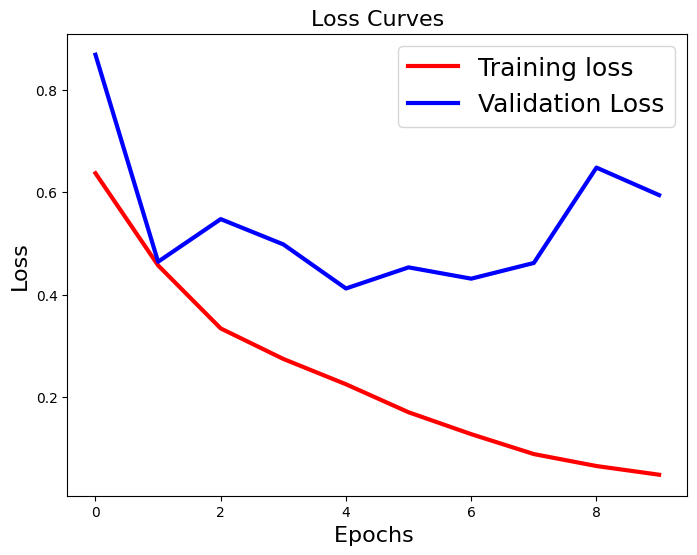

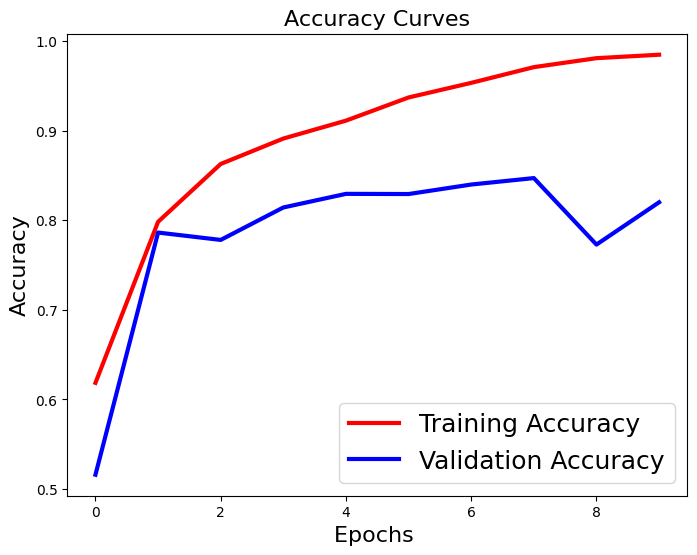

In [ ]:
plot_history(history)

## Example of a LSTM layer implemented in Keras

It's time to look at a practical example of using the LSTM layer.

We will configure a model in which such a layer will reside and train it on the IMDB dataset. It resembles the model presented earlier with the SimpleRNN layer. We will only specify the number of dimensions of the LSTM output object. We will leave the other arguments of this layer (there are many) with default values. The defaults of the Keras package are well thought out and usually "just work" without having to spend a lot of time manually tuning the parameters.

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['acc']
)
history = model.fit(
    input_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - acc: 0.5828 - loss: 0.6616 - val_acc: 0.8132 - val_loss: 0.4355
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - acc: 0.8168 - loss: 0.4116 - val_acc: 0.8516 - val_loss: 0.3516
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - acc: 0.8634 - loss: 0.3349 - val_acc: 0.8688 - val_loss: 0.3204
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8820 - loss: 0.2904 - val_acc: 0.7484 - val_loss: 0.5729
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - acc: 0.8903 - loss: 0.2728 - val_acc: 0.8454 - val_loss: 0.3751
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - acc: 0.9053 - loss: 0.2517 - val_acc: 0.8680 - val_loss: 0.3139
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - acc: 0.9145 - loss: 0.2277 - val_acc: 0.8820 - val_loss: 0.2914
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - acc: 0.9286 - loss: 0.1953 - val_acc: 0.8776 - val_loss: 0.3047
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/

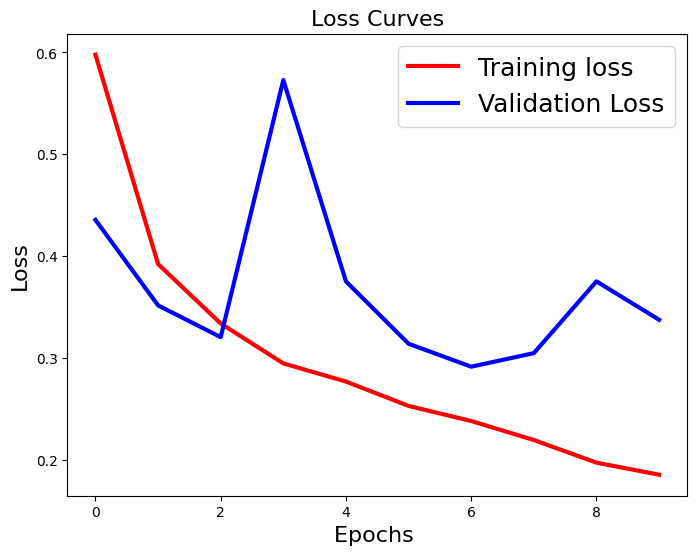

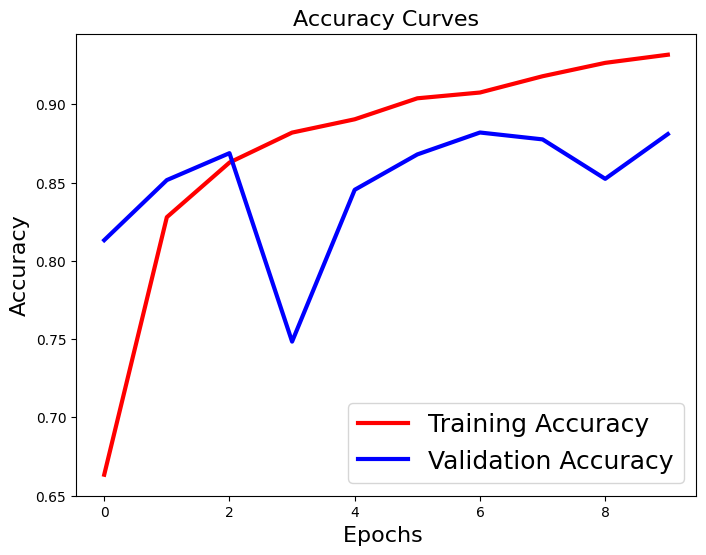

In [ ]:
plot_history(history)

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 5. Applications: Forecasting & Advanced NLP

In [ ]:
# import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

from keras.utils import pad_sequences, to_categorical
#from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Dense, GRU, Bidirectional, Embedding

from keras.callbacks import EarlyStopping

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Data Loading

In [ ]:
train = pd.read_csv("train.csv")
validation = pd.read_csv("validation.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
train.head()

text                 label
0                    find a cinema nearest for films  SearchScreeningEvent
1                 Give the current series two stars.              RateBook
2              find The Good Girl at a movie house\n  SearchScreeningEvent
3  Please make reservations for three at a kosher...        BookRestaurant
4  what is the forecast for here one second from now            GetWeather

In [ ]:
import re

def process_text(sentence):
    # remove punctuations and numbers
    return re.sub(r"[^a-zA-Z\s]", "", sentence.lower().strip())

In [ ]:
X_train = train['text'].apply(process_text).values
X_val = validation['text'].apply(process_text).values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

max_len = 15
vocab_size = len(tokenizer.word_index) + 1

X_train = pad_sequences(X_train, padding="post", truncating="post", maxlen=max_len)
X_val = pad_sequences(X_val, padding="post", truncating="post", maxlen=max_len)

In [ ]:
X_train[0]

array([13,  2, 83, 95,  5, 80,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

We must remember to encode the labels appropriately. We can do this in the form of single values or in the form of one-hot vectors - depending on the choice, we must choose a different cost function.

In [ ]:
num_classes = len(set(train['label']))

In [ ]:
label_enc = LabelEncoder()

y_train_encoded = label_enc.fit_transform(train['label'])
y_val_encoded = label_enc.transform(validation['label'])

In [ ]:
y_train_encoded

array([6, 4, 6, ..., 4, 0, 6])

In [ ]:
y_train, y_val = to_categorical(y_train_encoded), to_categorical(y_val_encoded)

In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Modeling

We will use a two-way neural network by using GRU cells.

In [ ]:
model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_len))
model.add(Bidirectional(GRU(64)))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 15, 100)           1130800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              63744     
 nal)                                                            
                                                                 
 dense_9 (Dense)             (None, 7)                 903       
                                                                 
Total params: 1,195,447
Trainable params: 1,195,447
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto'
)

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
173/173 [==============================] - 21s 89ms/step - loss: 0.6489 - acc: 0.8507 - val_loss: 0.0733 - val_acc: 0.9797
Epoch 2/10
173/173 [==============================] - 4s 20ms/step - loss: 0.0469 - acc: 0.9868 - val_loss: 0.0540 - val_acc: 0.9833
Epoch 3/10
173/173 [==============================] - 3s 17ms/step - loss: 0.0187 - acc: 0.9953 - val_loss: 0.0503 - val_acc: 0.9855
Epoch 4/10
173/173 [==============================] - 3s 15ms/step - loss: 0.0070 - acc: 0.9985 - val_loss: 0.0617 - val_acc: 0.9786
Epoch 5/10
173/173 [==============================] - 2s 13ms/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.0656 - val_acc: 0.9801


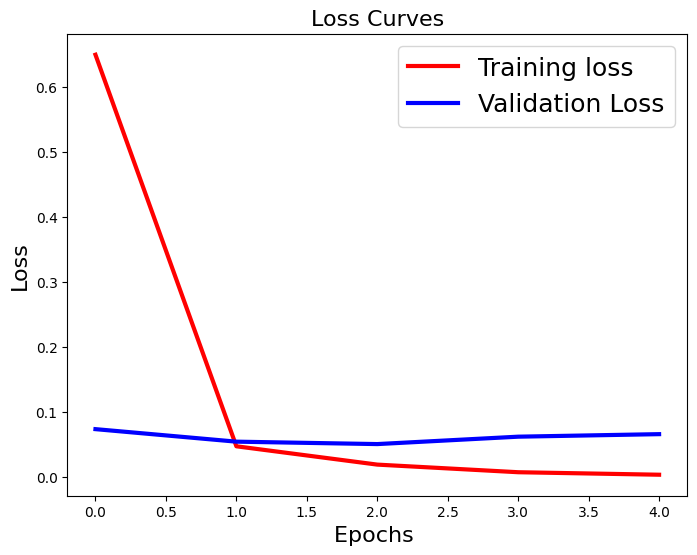

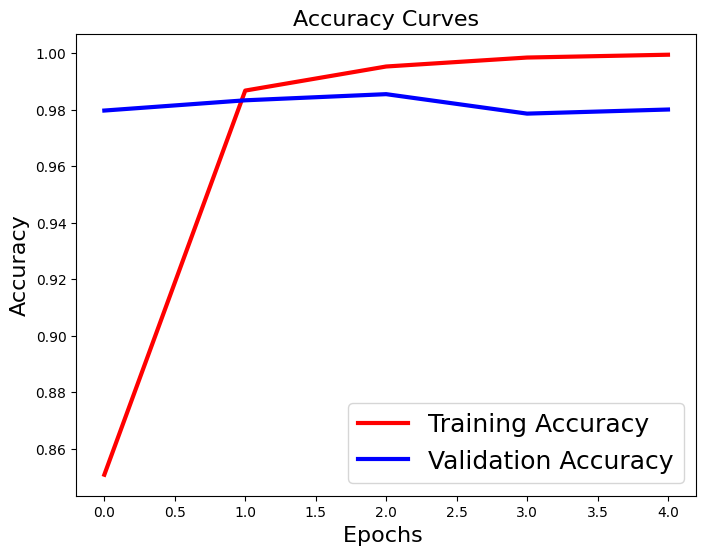

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(
    y_val_encoded, y_pred.argmax(axis=1), target_names=label_enc.classes_
))

22/22 [==============================] - 1s 4ms/step
                      precision    recall  f1-score   support

       AddToPlaylist       0.99      1.00      1.00       100
      BookRestaurant       0.99      0.99      0.99       100
          GetWeather       0.99      0.96      0.97       100
           PlayMusic       1.00      0.95      0.97       100
            RateBook       1.00      1.00      1.00       100
  SearchCreativeWork       0.93      0.99      0.96       100
SearchScreeningEvent       0.97      0.97      0.97       100

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700



In [ ]:
def predict_one(text, tokenizer, classifier, label_encoder):
    preprocess_text = process_text(text)
    transformed = tokenizer.texts_to_sequences([preprocess_text])
    padded = pad_sequences(
        transformed, padding="post", truncating="post", maxlen=max_len
    )
    return label_encoder.inverse_transform(model.predict(padded).argmax(axis=1))

In [ ]:
predict_one("Play some seventies music on YouTube.", tokenizer, model, label_enc)

1/1 [==============================] - 0s 25ms/step


array(['PlayMusic'], dtype=object)

In [ ]:
predict_one("Rate this book as 2 stars out of 10!!!!", tokenizer, model, label_enc)

1/1 [==============================] - 0s 29ms/step


array(['RateBook'], dtype=object)

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Model with embeddings
We download the GloVe dips from the https://nlp.stanford.edu/projects/glove/

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-07-17 20:43:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-07-17 20:43:35--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-07-17 20:43:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

We will use those with a size of 300.

In [ ]:
!head -10 "glove.6B.300d.txt"

the 0.04656 0.21318 -0.0074364 -0.45854 -0.035639 0.23643 -0.28836 0.21521 -0.13486 -1.6413 -0.26091 0.032434 0.056621 -0.043296 -0.021672 0.22476 -0.075129 -0.067018 -0.14247 0.038825 -0.18951 0.29977 0.39305 0.17887 -0.17343 -0.21178 0.23617 -0.063681 -0.42318 -0.11661 0.093754 0.17296 -0.33073 0.49112 -0.68995 -0.092462 0.24742 -0.17991 0.097908 0.083118 0.15299 -0.27276 -0.038934 0.54453 0.53737 0.29105 -0.0073514 0.04788 -0.4076 -0.026759 0.17919 0.010977 -0.10963 -0.26395 0.07399 0.26236 -0.1508 0.34623 0.25758 0.11971 -0.037135 -0.071593 0.43898 -0.040764 0.016425 -0.4464 0.17197 0.046246 0.058639 0.041499 0.53948 0.52495 0.11361 -0.048315 -0.36385 0.18704 0.092761 -0.11129 -0.42085 0.13992 -0.39338 -0.067945 0.12188 0.16707 0.075169 -0.015529 -0.19499 0.19638 0.053194 0.2517 -0.34845 -0.10638 -0.34692 -0.19024 -0.2004 0.12154 -0.29208 0.023353 -0.11618 -0.35768 0.062304 0.35884 0.02906 0.0073005 0.0049482 -0.15048 -0.12313 0.19337 0.12173 0.44503 0.25147 0.10781 -0.17716 0.0386

In [ ]:
!cut -d' ' -f1,2,5,200,300,301 "glove.6B.300d.txt" | head -15

the 0.04656 -0.45854 -0.010673 -0.20989 0.053913
, -0.25539 -0.042688 0.016878 -0.12226 0.35499
. -0.12559 -0.10123 0.3079 -0.022394 0.13684
of -0.076947 -0.72232 0.29626 -0.29183 -0.046533
to -0.25756 -0.38082 0.67854 0.046744 -0.070621
and 0.038466 -0.38923 0.31983 0.011807 0.059703
in -0.44399 -0.18582 -0.34799 -0.082191 -0.06255
a -0.29712 -0.344 -0.13819 -0.22853 0.29602
" 0.6947 0.012382 -0.3093 -0.63079 0.38089
's -0.001272 -0.26559 -0.35541 -0.76518 0.39206
for -0.24132 -0.26692 0.1415 -0.32837 0.15507
- 0.040598 -0.26526 0.34571 -0.193 0.22749
that -0.18256 -0.17443 -0.27396 -0.19107 -0.094104
on 0.12702 0.17677 -0.13095 -0.29371 0.24355
is -0.1749 -0.20512 0.098301 -0.40402 0.054744


In [ ]:
from tqdm.notebook import tqdm

In [ ]:
embeddings_dict = {}

with open("glove.6B.300d.txt") as glove_file:
    for line in tqdm(glove_file, total=4e5):
        splitted_line = line.split()
        word = splitted_line[0]
        vec = np.asarray(splitted_line[1:], dtype='float32')
        embeddings_dict[word] = vec

<ipython-input-106-c5c64ff7c48c>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for line in tqdm_notebook(glove_file, total=4e5):


  0%|          | 0/400000.0 [00:00<?, ?it/s]

In [ ]:
embeddings_dict['cat'][:100]

array([-0.29353  ,  0.33247  , -0.047372 , -0.12247  ,  0.071956 ,
       -0.23408  , -0.06238  , -0.0037192, -0.39462  , -0.69411  ,
        0.36731  , -0.12141  , -0.044485 , -0.15268  ,  0.34864  ,
        0.22926  ,  0.54361  ,  0.25215  ,  0.097972 , -0.087305 ,
        0.87058  , -0.12211  , -0.079825 ,  0.28712  , -0.68563  ,
       -0.27265  ,  0.22056  , -0.75752  ,  0.56293  ,  0.091377 ,
       -0.71004  , -0.3142   , -0.56826  , -0.26684  , -0.60102  ,
        0.26959  , -0.17992  ,  0.10701  , -0.57858  ,  0.38161  ,
       -0.67127  ,  0.10927  ,  0.079426 ,  0.022372 , -0.081147 ,
        0.011182 ,  0.67089  , -0.19094  , -0.33676  , -0.48471  ,
       -0.35406  , -0.15209  ,  0.44503  ,  0.46385  ,  0.38409  ,
        0.045081 , -0.59079  ,  0.21763  ,  0.38576  , -0.44567  ,
        0.009332 ,  0.442    ,  0.097062 ,  0.38005  , -0.11881  ,
       -0.42718  , -0.31005  , -0.025058 ,  0.12689  , -0.13468  ,
        0.11976  ,  0.76253  ,  0.2524   , -0.26934  ,  0.0686

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, idx in tokenizer.word_index.items():
    word_emb = embeddings_dict.get(word)
    if word_emb is not None:
        embedding_matrix[idx] = word_emb

In [ ]:
model = Sequential()

model.add(Embedding(
    vocab_size,
    300,
    input_length=max_len,
    weights=[embedding_matrix],
    trainable=False)
)
model.add(Bidirectional(GRU(64)))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 15, 300)           3392400   
                                                                 
 bidirectional_4 (Bidirectio  (None, 128)              140544    
 nal)                                                            
                                                                 
 dense_12 (Dense)            (None, 7)                 903       
                                                                 
Total params: 3,533,847
Trainable params: 141,447
Non-trainable params: 3,392,400
_________________________________________________________________
None


In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/10
173/173 [==============================] - 9s 16ms/step - loss: 0.3940 - acc: 0.8998 - val_loss: 0.0836 - val_acc: 0.9764
Epoch 2/10
173/173 [==============================] - 2s 9ms/step - loss: 0.0678 - acc: 0.9799 - val_loss: 0.0540 - val_acc: 0.9837
Epoch 3/10
173/173 [==============================] - 2s 14ms/step - loss: 0.0395 - acc: 0.9888 - val_loss: 0.0503 - val_acc: 0.9840
Epoch 4/10
173/173 [==============================] - 3s 17ms/step - loss: 0.0313 - acc: 0.9910 - val_loss: 0.0566 - val_acc: 0.9833
Epoch 5/10
173/173 [==============================] - 4s 22ms/step - loss: 0.0212 - acc: 0.9943 - val_loss: 0.0673 - val_acc: 0.9786


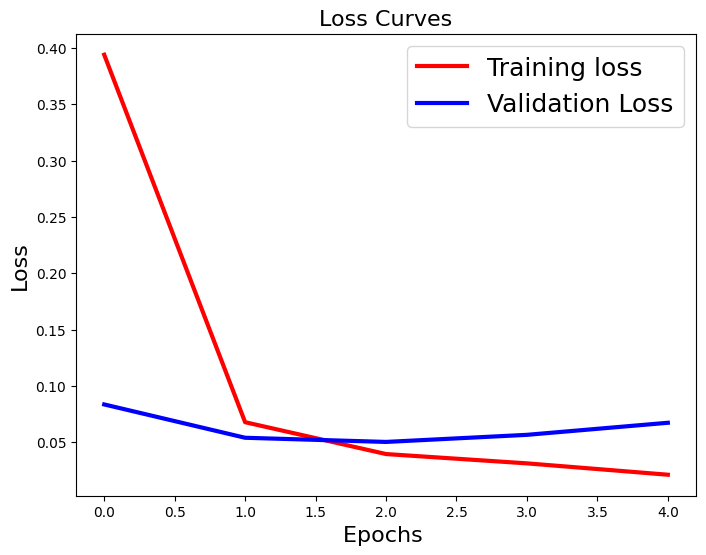

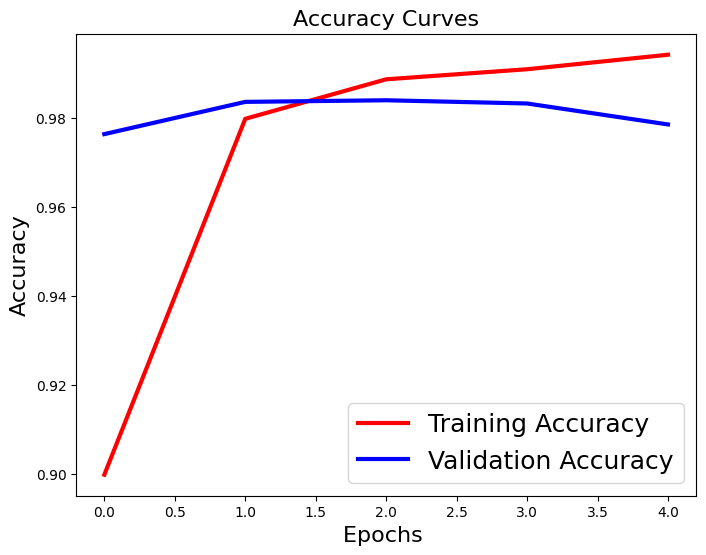

In [ ]:
plot_history(history)

In [ ]:
y_pred = model.predict(X_val)
print(classification_report(
    y_val_encoded, y_pred.argmax(axis=1), target_names=label_enc.classes_
))

22/22 [==============================] - 1s 3ms/step
                      precision    recall  f1-score   support

       AddToPlaylist       0.99      1.00      1.00       100
      BookRestaurant       1.00      1.00      1.00       100
          GetWeather       1.00      1.00      1.00       100
           PlayMusic       0.99      0.98      0.98       100
            RateBook       1.00      1.00      1.00       100
  SearchCreativeWork       0.92      0.98      0.95       100
SearchScreeningEvent       0.99      0.92      0.95       100

            accuracy                           0.98       700
           macro avg       0.98      0.98      0.98       700
        weighted avg       0.98      0.98      0.98       700

